In [195]:
from tqdm import tqdm
import re
import json as js
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from sklearn.metrics import mean_squared_error
from keras.models import load_model

In [2]:
rawdata = pd.read_csv('./chinese_review.csv')

In [3]:
rawdata.shape

(209897, 4)

In [4]:
rawdata.head()

,business_id,date,stars,text
0,176386,2016-05-07 01:21:02,3.0,Tracy dessert had a big name in Hong Kong and ...
1,176386,2015-10-23 15:26:39,3.0,The squid balls were AMAZING. Crispy exterior ...
2,176386,2016-03-07 18:31:19,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ..."
3,176386,2014-01-17 19:48:30,1.0,We came on a Friday and the store said that th...
4,176386,2011-07-29 04:00:20,3.0,I think this is a cool little hang out place f...


In [16]:
rawdata.iloc[58596]

business_id                                               149206
date                                         2018-11-14 17:24:28
stars                                                          4
text           7分 金阁的干炒牛河 比较正宗的广式牛河 \n河粉用的是窄型的 较有弹性 整体来说颜色分布均...
Name: 58596, dtype: object

# Data processing

In [5]:
dat_pred = rawdata[['text','stars']]

In [6]:
dat_pred.shape

(209897, 2)

In [7]:
dat_pred.head()

,text,stars
0,Tracy dessert had a big name in Hong Kong and ...,3.0
1,The squid balls were AMAZING. Crispy exterior ...,3.0
2,"Must Try: Mango Sago with Pommels, Shaved Ice ...",4.0
3,We came on a Friday and the store said that th...,1.0
4,I think this is a cool little hang out place f...,3.0


In [155]:
X = dat_pred['text']
y = dat_pred['stars']

In [168]:
X[0]

"Tracy dessert had a big name in Hong Kong and the one in First Markham place has been here for many years now! \n\nCame in for some Chinese dessert, and I must say their selection has increased tremendously over the years. I might as well add that the price has also increased tremendously as well. The waitress gave us tea, which I could taste had red date in it. Fancy!\n\nA simple taro with coconut with tapioca pearls was like $5.25 or something. Basically all the desserts were more than $5. That's crazy! I can literally just make this dessert at home and for a bowl, it would probably cost like $0.50. A few years ago, I think I can still get it for like $3-$4, which is more reasonable, but wow, more than $5 is a little over the top for this dessert. Though I must say, it is Tracy Dessert, and they are a little more on the expensive side. \n\nI also saw other items on the menu like fish balls, chicken wings, shaved ice. My friend got a mango drink with fresh mango in it! \n\nI'm also s

In [183]:
y[0]

3.0

In [169]:
len(X[0].split(' '))

243

# Tokenize

In [156]:
Tokenizer()

In [157]:
tokenizer = Tokenizer(num_words=20000, lower=True)

In [158]:
tokenizer.fit_on_texts(X)

In [159]:
tk_raw = tokenizer.texts_to_sequences(X)

In [160]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'a': 4,
 'to': 5,
 'was': 6,
 'of': 7,
 'is': 8,
 'it': 9,
 'for': 10,
 'in': 11,
 'food': 12,
 'we': 13,
 'this': 14,
 'but': 15,
 'with': 16,
 'that': 17,
 'my': 18,
 'they': 19,
 'you': 20,
 'not': 21,
 'good': 22,
 'on': 23,
 'place': 24,
 'have': 25,
 'were': 26,
 'had': 27,
 'so': 28,
 'are': 29,
 'at': 30,
 'as': 31,
 'very': 32,
 'be': 33,
 'here': 34,
 'chicken': 35,
 'service': 36,
 'like': 37,
 'chinese': 38,
 'there': 39,
 'all': 40,
 'if': 41,
 'out': 42,
 'great': 43,
 'just': 44,
 'their': 45,
 'restaurant': 46,
 "it's": 47,
 'one': 48,
 'our': 49,
 'rice': 50,
 'time': 51,
 'from': 52,
 'me': 53,
 'get': 54,
 'or': 55,
 'go': 56,
 'really': 57,
 'ordered': 58,
 'order': 59,
 'when': 60,
 'would': 61,
 'back': 62,
 'soup': 63,
 'fried': 64,
 'which': 65,
 'some': 66,
 'up': 67,
 'will': 68,
 'also': 69,
 'more': 70,
 'what': 71,
 'been': 72,
 'noodles': 73,
 'beef': 74,
 'only': 75,
 'can': 76,
 'too': 77,
 'about': 78,
 'no': 79,
 'other'

In [161]:
len(tk_raw[:1][0])

247

In [163]:
tk_raw[:1][0]

[7396,
 363,
 27,
 4,
 218,
 517,
 11,
 691,
 702,
 2,
 1,
 48,
 11,
 121,
 1188,
 24,
 108,
 72,
 34,
 10,
 190,
 275,
 206,
 89,
 11,
 10,
 66,
 38,
 363,
 2,
 3,
 352,
 176,
 45,
 379,
 108,
 3649,
 7164,
 133,
 1,
 275,
 3,
 470,
 31,
 97,
 519,
 17,
 1,
 132,
 108,
 69,
 3649,
 7164,
 31,
 97,
 1,
 325,
 356,
 86,
 150,
 65,
 3,
 148,
 135,
 27,
 466,
 1029,
 11,
 9,
 902,
 4,
 664,
 1132,
 16,
 821,
 16,
 1820,
 4230,
 6,
 37,
 116,
 784,
 55,
 210,
 831,
 40,
 1,
 842,
 26,
 70,
 101,
 116,
 278,
 1045,
 3,
 76,
 716,
 44,
 156,
 14,
 363,
 30,
 273,
 2,
 10,
 4,
 263,
 9,
 61,
 261,
 780,
 37,
 1390,
 505,
 4,
 186,
 275,
 567,
 3,
 157,
 3,
 76,
 151,
 54,
 9,
 10,
 37,
 138,
 185,
 65,
 8,
 70,
 425,
 15,
 753,
 70,
 101,
 116,
 8,
 4,
 113,
 133,
 1,
 342,
 10,
 14,
 363,
 193,
 3,
 352,
 176,
 9,
 8,
 7396,
 363,
 2,
 19,
 29,
 4,
 113,
 70,
 23,
 1,
 502,
 240,
 3,
 69,
 565,
 80,
 248,
 23,
 1,
 81,
 37,
 221,
 710,
 35,
 580,
 1434,
 451,
 18,
 319,
 93,
 4,
 707,
 305,


In [164]:
tk_raw_len = [len(var) for var in tk_raw]

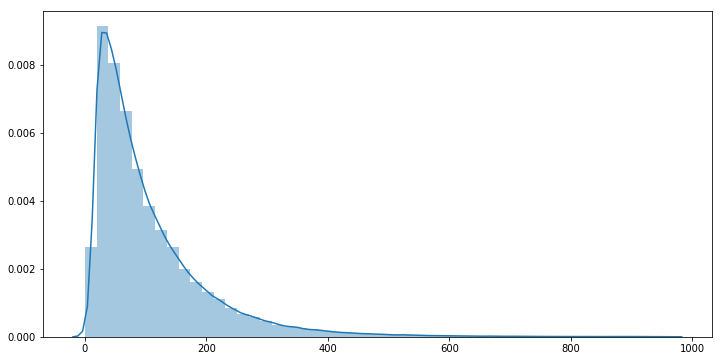

In [165]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(tk_raw_len)
plt.show()

In [166]:
tk_raw_final = pad_sequences(tk_raw, maxlen=200)

In [170]:
tk_raw_final.shape

(209897, 200)

In [167]:
tk_raw_final[:1][0]

array([   1,  132,  108,   69, 3649, 7164,   31,   97,    1,  325,  356,
         86,  150,   65,    3,  148,  135,   27,  466, 1029,   11,    9,
        902,    4,  664, 1132,   16,  821,   16, 1820, 4230,    6,   37,
        116,  784,   55,  210,  831,   40,    1,  842,   26,   70,  101,
        116,  278, 1045,    3,   76,  716,   44,  156,   14,  363,   30,
        273,    2,   10,    4,  263,    9,   61,  261,  780,   37, 1390,
        505,    4,  186,  275,  567,    3,  157,    3,   76,  151,   54,
          9,   10,   37,  138,  185,   65,    8,   70,  425,   15,  753,
         70,  101,  116,    8,    4,  113,  133,    1,  342,   10,   14,
        363,  193,    3,  352,  176,    9,    8, 7396,  363,    2,   19,
         29,    4,  113,   70,   23,    1,  502,  240,    3,   69,  565,
         80,  248,   23,    1,   81,   37,  221,  710,   35,  580, 1434,
        451,   18,  319,   93,    4,  707,  305,   16,  124,  707,   11,
          9,  109,   69,  597,  154,  190,  134,   

# Split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(tk_raw_final, y, test_size = 0.3, random_state = 123)

In [172]:
X_train.shape

(146927, 200)

In [174]:
X_train[:1]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
         3492,  2817,     7,  1540,  2352,   461,  1583,     5,   273,
          843,   290,     5,   130,    86,     5,   691,   977,   223,
          640,     2,  1768,    54,   958,   452,     2,   162,  2921,
            2,     1,    75,    24,    17,   148,   156,     1,  2921,
            1,   250,   799,    31,   745,     6,    30,  5236,     1,
         2647,    30,  1540,     8,    94,  2843,    28,   669,  4737,
           17,    24,    10,  3810,    18,  1829,  1765,    86,     4,
         2273,     7,   365,   219,     2,    13,   313,     5,    90,
            9,   183,   283,     1,    46,     8,    78,   138,   185,
          180,  1184,     2,    70,   375,   101,   235,  2912,   262,
            1,   371,     8,   225,     2,   664,     3,   367,    37,
      

# LSTM

In [175]:
maxlen = 200
max_features = 20000
embedding_size = 128

In [176]:
inp = Input(shape=(maxlen,))

In [177]:
x = Embedding(max_features, embedding_size)(inp)

In [178]:
x = LSTM(64, return_sequences=True)(x)

In [179]:
x = GlobalMaxPool1D()(x)

In [180]:
x = Dropout(0.2)(x)

In [181]:
x = Dense(1, activation='relu')(x)

In [182]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='mean_squared_error',
                  optimizer='adam')

In [186]:
model.fit(X_train, y_train, batch_size=16, epochs=2)

Epoch 1/2
146927/146927 [==============================] - 4238s 29ms/step - loss: 0.6601
Epoch 2/2
146927/146927 [==============================] - 4193s 29ms/step - loss: 0.4532


In [187]:
model.save('first_model.h5')

# Predict

In [188]:
y_pre = model.predict(X_test)

In [189]:
y_pre[:10]

array([[1.9351296],
       [2.8823957],
       [4.720576 ],
       [3.6682773],
       [3.5360575],
       [4.890497 ],
       [4.1979227],
       [3.474938 ],
       [3.2169373],
       [4.0559616]], dtype=float32)

In [190]:
y_pre.shape

(62970, 1)

In [191]:
y_test[:10]

94637     1.0
178764    3.0
14685     5.0
24345     3.0
20150     3.0
21672     5.0
164167    4.0
64444     3.0
162130    2.0
10623     3.0
Name: stars, dtype: float64

In [192]:
y_test.shape

(62970,)

In [193]:
mean_squared_error(y_pre,y_test)

0.44402252727067987

# Loading model

In [196]:
model_try = load_model('first_model.h5')